## Prosper Loan Data


### Preliminary Wrangling


#### This document explores a dataset containing prices and attributes for approximately 113937 round-cut diamonds.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

%matplotlib inline

import plotly.express as px

In [2]:
loan_df = pd.read_csv("/Users/adedayo/Desktop/ALX-T/prosperLoanData.csv")

loan_df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
# high-level overview of data shape and composition
print(loan_df.shape)
print(loan_df.dtypes)
print(loan_df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'], format='%Y-%m-%d %H:%M:%S')

loan_df['ClosedDate'] = pd.to_datetime(loan_df['ClosedDate'], format='%Y-%m-%d %H:%M:%S')

loan_df['DateCreditPulled'] = pd.to_datetime(loan_df['DateCreditPulled'], format='%Y-%m-%d %H:%M:%S')

loan_df['FirstRecordedCreditLine'] = pd.to_datetime(loan_df['FirstRecordedCreditLine'], format='%Y-%m-%d %H:%M:%S')

loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'], format='%Y-%m-%d %H:%M:%S')

In [6]:
#getting number of missing values in each column:

loan_df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
# calculating the percentage of missing values in each column:

null_percentage = loan_df.isna().sum()/loan_df.shape[0]*100

null_percentage

ListingKey                      0.000000
ListingNumber                   0.000000
ListingCreationDate             0.000000
CreditGrade                    74.588588
Term                            0.000000
                                 ...    
PercentFunded                   0.000000
Recommendations                 0.000000
InvestmentFromFriendsCount      0.000000
InvestmentFromFriendsAmount     0.000000
Investors                       0.000000
Length: 81, dtype: float64

In [8]:
# getting columns with more than 60% missing values

col_to_drop = null_percentage[null_percentage>60].keys()

col_to_drop

Index(['CreditGrade', 'GroupKey', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')

In [9]:
# dropping columns with more than 60% missing values:

loan_df = loan_df.drop(col_to_drop, axis=1)

loan_df.head(10)

ListingKey  ListingNumber     ListingCreationDate  Term  \
0  1021339766868145413AB3B         193129 2007-08-26 19:09:29.263    36   
1  10273602499503308B223C1        1209647 2014-02-27 08:28:07.900    36   
2  0EE9337825851032864889A          81716 2007-01-05 15:00:47.090    36   
3  0EF5356002482715299901A         658116 2012-10-22 11:02:35.010    36   
4  0F023589499656230C5E3E2         909464 2013-09-14 18:38:39.097    36   
5  0F05359734824199381F61D        1074836 2013-12-14 08:26:37.093    60   
6  0F0A3576754255009D63151         750899 2013-04-12 09:52:56.147    36   
7  0F1035772717087366F9EA7         768193 2013-05-05 06:49:27.493    36   
8  0F043596202561788EA13D5        1023355 2013-12-02 10:43:39.117    36   
9  0F043596202561788EA13D5        1023355 2013-12-02 10:43:39.117    36   

  LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  \
0  Completed 2009-08-14      0.16516        0.1580       0.1380   
1    Current        NaT      0.12016        0.0920       0.0820   
2  Completed 2009-12-17      0.28269        0.2750       0.2400   
3    Current        NaT      0.12528        0.0974       0.0874   
4    Current        NaT      0.24614        0.2085       0.1985   
5    Current        NaT      0.15425        0.1314       0.1214   
6    Current        NaT      0.31032        0.2712       0.2612   
7    Current        NaT      0.23939        0.2019       0.1919   
8    Current        NaT      0.07620        0.0629       0.0529   
9    Current        NaT      0.07620        0.0629       0.0529   

   EstimatedEffectiveYield  ...  LP_ServiceFees  LP_CollectionFees  \
0                      NaN  ...         -133.18                0.0   
1                  0.07960  ...            0.00                0.0   
2                      NaN  ...          -24.20                0.0   
3                  0.08490  ...         -108.01                0.0   
4                  0.18316  ...          -60.27                0.0   
5                  0.11567  ...          -25.33                0.0   
6                  0.23820  ...          -22.95                0.0   
7                  0.17830  ...          -69.21                0.0   
8                  0.05221  ...          -16.77                0.0   
9                  0.05221  ...          -16.77                0.0   

   LP_GrossPrincipalLoss LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments  \
0                    0.0                 0.0                              0.0   
1                    0.0                 0.0                              0.0   
2                    0.0                 0.0                              0.0   
3                    0.0                 0.0                              0.0   
4                    0.0                 0.0                              0.0   
5                    0.0                 0.0                              0.0   
6                    0.0                 0.0                              0.0   
7                    0.0                 0.0                              0.0   
8                    0.0                 0.0                              0.0   
9                    0.0                 0.0                              0.0   

   PercentFunded Recommendations InvestmentFromFriendsCount  \
0            1.0               0                          0   
1            1.0               0                          0   
2            1.0               0                          0   
3            1.0               0                          0   
4            1.0               0                          0   
5            1.0               0                          0   
6            1.0               0                          0   
7            1.0               0                          0   
8            1.0               0                          0   
9            1.0               0                          0   

  InvestmentFromFriendsAmount  Investors  
0                         0.0        258  
1        

In [10]:
loan_df.shape

(113937, 70)

##### The dataset has been reduced to 1113,937 rows with 70 columns.

In [11]:
loan_df.duplicated().sum()

0

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   ListingCreationDate                 113937 non-null  datetime64[ns]
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   ClosedDate                          55089 non-null   datetime64[ns]
 6   BorrowerAPR                         113912 non-null  float64       
 7   BorrowerRate                        113937 non-null  float64       
 8   LenderYield                         113937 non-null  float64       
 9   EstimatedEffectiveYield             84853 non-null   float64       
 10  Estimate

In [13]:
loan_df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

### What is the structure of your dataset?

There are 113,937 rows in the dataset with 80 features. After dropping columns with lots of missing values, I am left with 70 features. Interestingly, there are no duplicated values in the dataset.


### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out what features are best for predicting Borrower APR/Borrower Rate in the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Term, Employment Status and Prosper Score will have the strongest effect on each Borrower's APR: the higher the Borrower's APR, the longer the Term.

#### The following are my features of interest in the dataset:


1. LoanStatus

2. LoanOriginalAmount

3. BorrowerAPR

4. Term

5. ProsperScore

6. BorrowerState

7. BorrowerRate

8. EmploymentStatus

9. Occupation

10. IsBorrowerHomeowner

11. StatedMonthlyIncome

12. DebtToIncomeRatio

13. LoanOriginationDate

# A. Univariate Exploration

I will visualize the distribution of all the variables in the dataset subset to see better understand how each variable is represented.

In [14]:
# Subsetting the dataframe by selecting features of interest
cols = ['LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR', 'Term', 'ProsperScore', 
        'BorrowerState', 'BorrowerRate', 'EmploymentStatus', 'Occupation',
        'IsBorrowerHomeowner', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'LoanOriginationDate']
loan_sub = loan_df[cols]

In [15]:
loan_sub.head(10)

LoanStatus  LoanOriginalAmount  BorrowerAPR  Term  ProsperScore  \
0  Completed                9425      0.16516    36           NaN   
1    Current               10000      0.12016    36           7.0   
2  Completed                3001      0.28269    36           NaN   
3    Current               10000      0.12528    36           9.0   
4    Current               15000      0.24614    36           4.0   
5    Current               15000      0.15425    60          10.0   
6    Current                3000      0.31032    36           2.0   
7    Current               10000      0.23939    36           4.0   
8    Current               10000      0.07620    36           9.0   
9    Current               10000      0.07620    36          11.0   

  BorrowerState  BorrowerRate EmploymentStatus      Occupation  \
0            CO        0.1580    Self-employed           Other   
1            CO        0.0920         Employed    Professional   
2            GA        0.2750    Not available           Other   
3            GA        0.0974         Employed   Skilled Labor   
4            MN        0.2085         Employed       Executive   
5            NM        0.1314         Employed    Professional   
6            KS        0.2712         Employed  Sales - Retail   
7            CA        0.2019         Employed         Laborer   
8            IL        0.0629         Employed    Food Service   
9            IL        0.0629         Employed    Food Service   

   IsBorrowerHomeowner  StatedMonthlyIncome  DebtToIncomeRatio  \
0                 True          3083.333333               0.17   
1                False          6125.000000               0.18   
2                False          2083.333333               0.06   
3                 True          2875.000000               0.15   
4                 True          9583.333333               0.26   
5                 True          8333.333333               0.36   
6                False          2083.333333               0.27   
7                False          3355.750000               0.24   
8                 True          3333.333333               0.25   
9                 True          3333.333333               0.25   

  LoanOriginationDate  
0          2007-09-12  
1          2014-03-03  
2          2007-01-17  
3          2012-11-01  
4          2013-09-20  
5          2013-12-24  
6          2013-04-18  
7          2013-05-13  
8          2013-12-12  
9          2013-12-12

In [16]:
### estimating descriptive statistics for the columns with numeric variables:

loan_sub.describe()

LoanOriginalAmount    BorrowerAPR           Term  ProsperScore  \
count        113937.00000  113912.000000  113937.000000  84853.000000   
mean           8337.01385       0.218828      40.830248      5.950067   
std            6245.80058       0.080364      10.436212      2.376501   
min            1000.00000       0.006530      12.000000      1.000000   
25%            4000.00000       0.156290      36.000000      4.000000   
50%            6500.00000       0.209760      36.000000      6.000000   
75%           12000.00000       0.283810      36.000000      8.000000   
max           35000.00000       0.512290      60.000000     11.000000   

        BorrowerRate  StatedMonthlyIncome  DebtToIncomeRatio  
count  113937.000000         1.139370e+05      105383.000000  
mean        0.192764         5.608026e+03           0.275947  
std         0.074818         7.478497e+03           0.551759  
min         0.000000         0.000000e+00           0.000000  
25%         0.134000         3.200333e+03           0.140000  
50%         0.184000         4.666667e+03           0.220000  
75%         0.250000         6.825000e+03           0.320000  
max         0.497500         1.750003e+06          10.010000

## 1.  Distribution of Loan Term

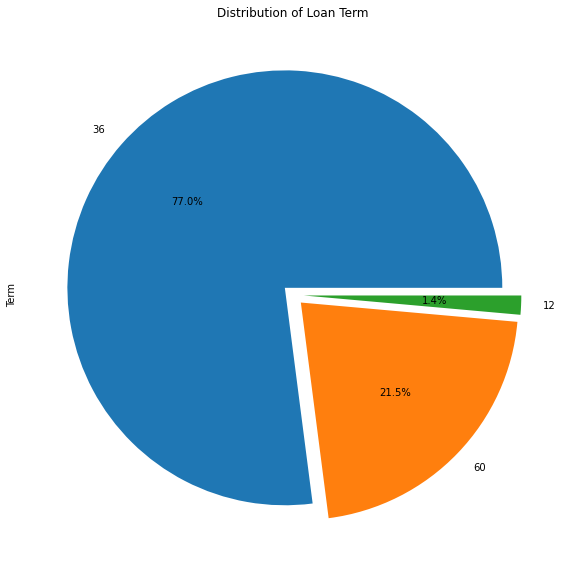

In [17]:
loan_sub['Term'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', figsize=(15,10))
plt.title('Distribution of Loan Term')
plt.show()

##### As seen from the plot, Prosper Loan Terms are categorized into 36 months, 60 months and 12 months. Of these categories, 36 months is the most popular among borrowers with 77.5% of the borrowers prefering the term. 12 months is the least popular with less than 2% of the borrowers choosing the option.

## 2. Distribution of Borrowers Occupation

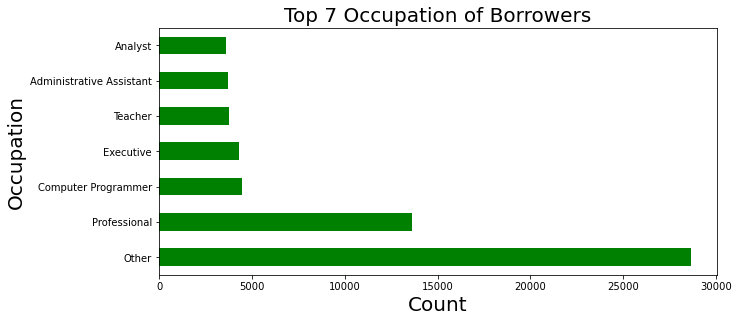

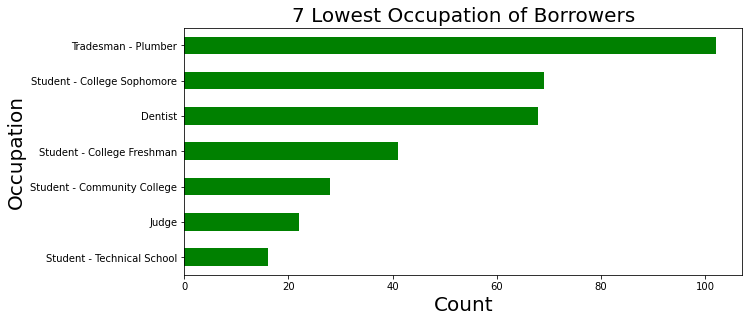

In [18]:
top_occupation = loan_sub['Occupation'].value_counts().nlargest(7)
least_occupation = loan_sub['Occupation'].value_counts().nsmallest(7)

plt.figure(figsize = [10, 10])

plt.subplot(2, 1, 1)
top_occupation.plot.barh(color='green',rot=0)
plt.title('Top 7 Occupation of Borrowers',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':20})
plt.ylabel('Occupation',fontdict={'size':20})
plt.show()

plt.figure(figsize = [10, 10])
plt.subplot(2, 1, 2)
least_occupation.plot.barh(color='green',rot=0)
plt.title('7 Lowest Occupation of Borrowers',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':20})
plt.ylabel('Occupation',fontdict={'size':20})
plt.show()

#### I looked at the Top 7 and Bottom 7 Occupations represented in the dataset. From the plot, Other (Non-conventional) jobs is the most represented occupation with more than 28000 of the borrowers falling into that category. Students in Technical schools were the least represented in the dataset.

## 3. Distribution of Borrowers Across States

In [19]:
# Plotting map of US states using plotly.
fig = px.choropleth(locations=loan_sub['BorrowerState'].value_counts().index,
                    locationmode="USA-states",color= loan_sub['BorrowerState'].value_counts().values,scope="usa",
                    hover_name=loan_sub['BorrowerState'].value_counts().index,hover_data={'Borrowers':loan_sub['BorrowerState'].value_counts().values})
fig.layout.coloraxis.colorbar.title = 'Number of Borrowers'
fig.layout.title = 'U.S map showing distribution of borrowers across states'
fig.show()

#### From the plot, California has the highest number of borrowers while Texas, Florida, and New York had more than 6,000 borrowers. North Dakota has the lowest representatiuon in the dataset with only just 52 borrowers.

## 4. Distribution of Employment Status

In [20]:
## Converting Employment status into ordered categorical types

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)

/var/folders/hz/9hfb8zks6yv2jbwj53fz4hcm0000gn/T/ipykernel_6484/1061253075.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



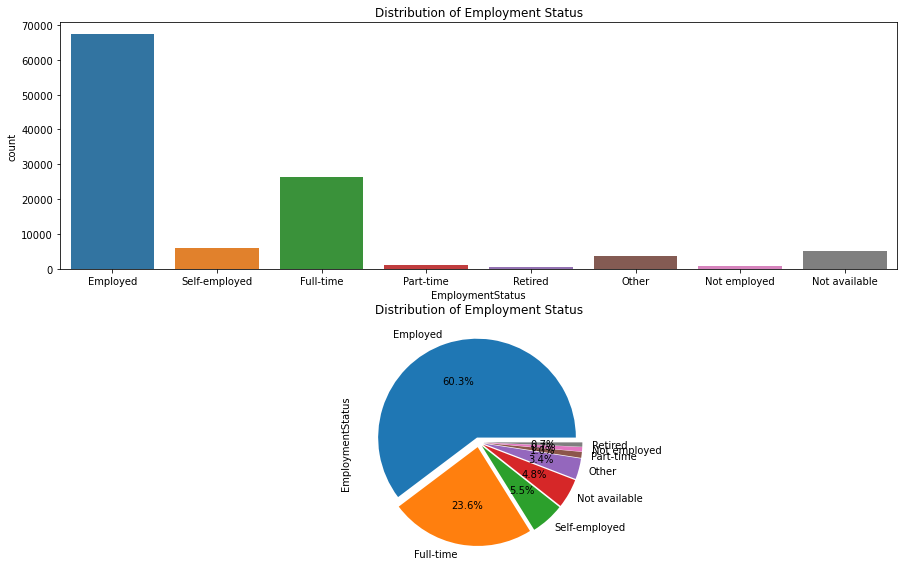

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.title("Distribution of Employment Status")
sns.countplot(x='EmploymentStatus', data=loan_sub)


plt.subplot(212)
loan_sub['EmploymentStatus'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05,
                                                              0.05, 0.05, 0.05,
                                                             0.05, 0.05], autopct='%1.1f%%', figsize=(15,10))
plt.title('Distribution of Employment Status')
plt.show()

### From the plot, more than 55,000 borrowers in the dataset are employed which is the highest of all the recorded employment status. Among the borrowers, more than 25,000 claim to be working full-time . The least represented employment status in the dataset are the retired and unemployed.

## 5. Distribution of Loan Origination Date

In [22]:
loan_sub['LoanOriginationMonth'] = loan_sub['LoanOriginationDate'].dt.strftime('%B')
loan_sub['LoanOriginationYear'] = loan_sub['LoanOriginationDate'].dt.year

/var/folders/hz/9hfb8zks6yv2jbwj53fz4hcm0000gn/T/ipykernel_6484/1408881633.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hz/9hfb8zks6yv2jbwj53fz4hcm0000gn/T/ipykernel_6484/1408881633.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/hz/9hfb8zks6yv2jbwj53fz4hcm0000gn/T/ipykernel_6484/1949510925.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:title={'center':'Distribution of Loan Month'}, xlabel='LoanOriginationMonth', ylabel='count'>

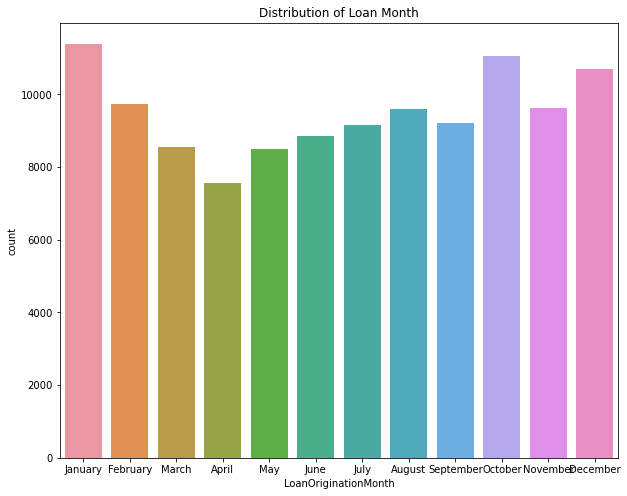

In [23]:
month_order = ['January','February','March','April','May','June','July', 'August', 'September',
              'October', 'November', 'December']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = month_order)
loan_sub['LoanOriginationMonth'] = loan_sub['LoanOriginationMonth'].astype(ordered_var)

plt.figure(figsize=(10,8))
plt.title("Distribution of Loan Month")
sns.countplot(x='LoanOriginationMonth', data=loan_sub)

#### From the plot, the period recorded in the dataset was 2005 to 2014. In this period, 2013 recorded the highest number of loans with about 30,000 loans given out that year. 2005 recorded the lowest amount given that it was the year of inception of the business. There was a major downturn from 2008 to mid 2009 and mid 2013 to 2014. The 2008 to 2009 downturn may most likely be due to the global economic recession of that period.

#### In terms of months, January records the highest number of loans given out with April recording the lowest. A good explanation for January having the highest number of loans is the fact most secure loan in January to set themselves in place for their new year finanical goals since that's officially the start of a new year.

### 6. Distribution of Loan Status

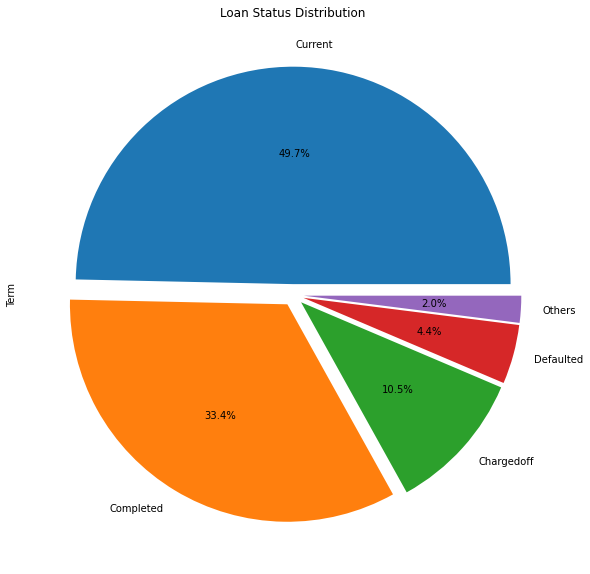

In [24]:
df1 = loan_sub.groupby('LoanStatus')['Term'].count()
### Combine categories
df1 = df1.sort_values(ascending=False)
df1['Others'] = df1[4:].sum()
df1 = df1.iloc[[0,1,2,3,-1]]


df1.plot.pie(explode=[0.05, 0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', figsize=(15,10))
plt.title('Loan Status Distribution')
plt.show()

#### In terms of Loan Status, Current loans had the highest frequency while completed loans had more counts than both Chargedoff and Defaulted combined.

## 7. Distribution of Borrower Who Are Homeowner or Not

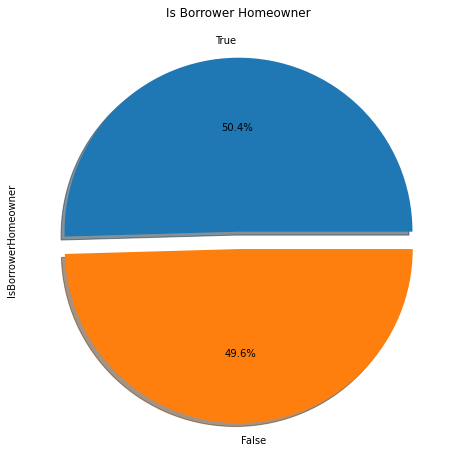

In [25]:
loan_sub['IsBorrowerHomeowner'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Is Borrower Homeowner')
plt.show()

#### 50.4% of the borrowers are homeowners while 49.6% are not.

## 8. Distribution of Borrower APR

Text(0, 0.5, 'Frequency')

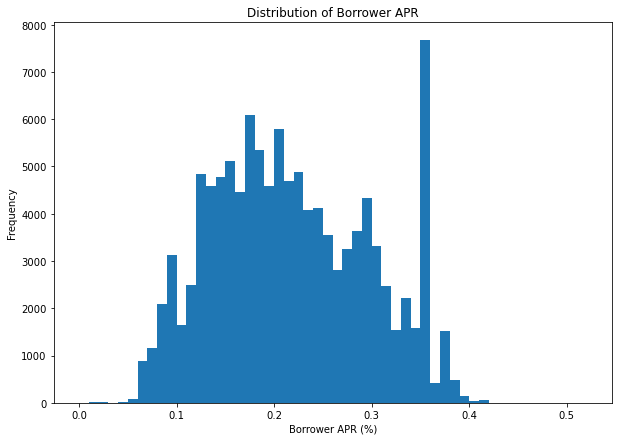

In [26]:
plt.figure(figsize = [10,7]) 
bins = np.arange(0, loan_sub.BorrowerAPR.max()+0.01, 0.01)
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR (%)')
plt.title('Distribution of Borrower APR')
plt.ylabel('Frequency')

#### APR means Annual Percentage Rate. The distribution of the Borrower APR for this dataset peaks around 0.36 (i.e. the mode) which is very high considering the midpoint is 0.25. A lower APR is however always preferable for borrowers, which implies that a lot of borrowers in the dataset are not obtaining a reasonably good APR. Those below the mean APR value of 0.21 can be said to be getting a good deal.

## 9. Distribution of Borrower Rate

Text(0, 0.5, 'Frequency')

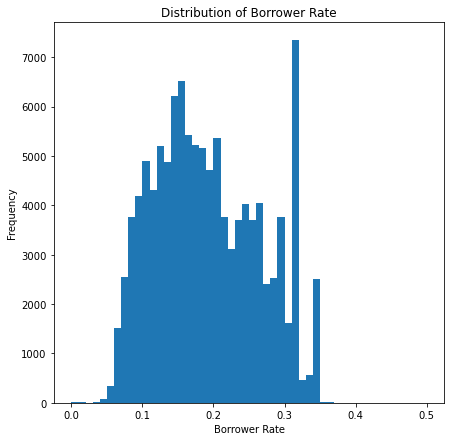

In [27]:
bins = np.arange(0, loan_sub.BorrowerRate.max()+0.01, 0.01)
plt.figure(figsize=[7,7])
plt.hist(data = loan_sub, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate')
plt.title('Distribution of Borrower Rate')
plt.ylabel('Frequency')

#### The Borrower rate popularly known as the Interest Rate  distribution appears to be bimodal (right-skewed) in distribution with one peak lying between 0.15 and 0.17 and another peak lies between 0.30 and 0.33. The mode value however appears to be slighter lower than the Borrower APR. The mean, interestingly is also lower at 0.19 indicating that more buyers get good interest rate.

## Borrower APR versus Borrower Rate

The APR (according to financial industry knowledge) reflects the borrower rate and other variables like mortgage broker fees, and other charges that a borrower incure to get the loan so it will be nice to compare both

In [28]:
loan_sub['BorrowerRate'].corr(loan_sub['BorrowerAPR'])

0.989823970303315

#### At 0.9898, both variables are almlost perfectly correlated so I will make use of the Borrower APR henceforth since it takes more into account than the BorrowerRate.

### 10. Distribution of Debt To Income Ratio

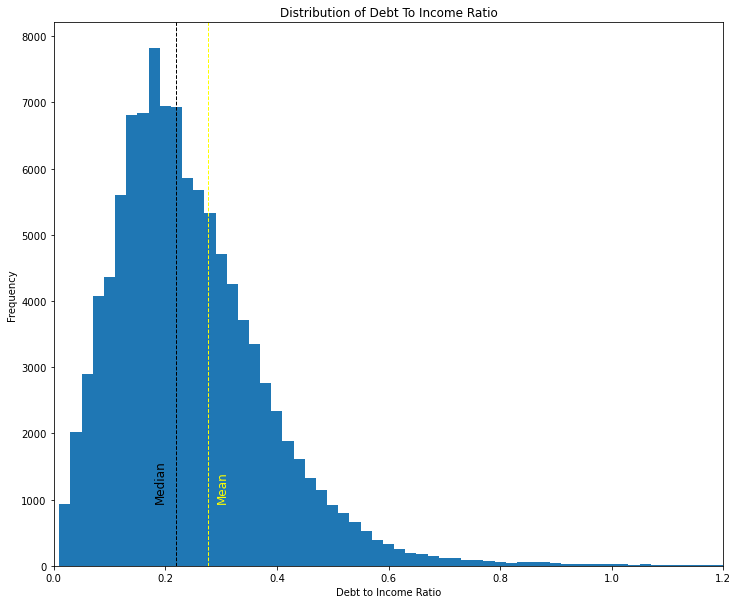

In [29]:
binsize = 0.02
bins = np.arange(0.01, loan_sub['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[12, 10])
plt.hist(data = loan_sub[loan_sub['DebtToIncomeRatio'].notnull()],\
                 x = 'DebtToIncomeRatio', bins = bins)
plt.axvline(loan_sub['DebtToIncomeRatio'].mean(), color='yellow', linestyle='dashed', linewidth=1)
plt.annotate('Mean', xy=(0.29,1000), rotation=90, color='yellow', fontsize=12)
plt.axvline(loan_sub['DebtToIncomeRatio'].median(), color='k', linestyle='dashed', linewidth=1)
plt.annotate('Median', xy=(0.18,1000), rotation=90, color='k', fontsize=12)
plt.xlabel('Debt to Income Ratio')
plt.title('Distribution of Debt To Income Ratio')
plt.ylabel('Frequency')
plt.xlim(0,1.2);

#### The distribution of the Debt to Income Ratio appears to be unimodal and right skewed with the median lower than the mean.

## 11. Distribution of Loan Amount

Text(0, 0.5, 'Frequency')

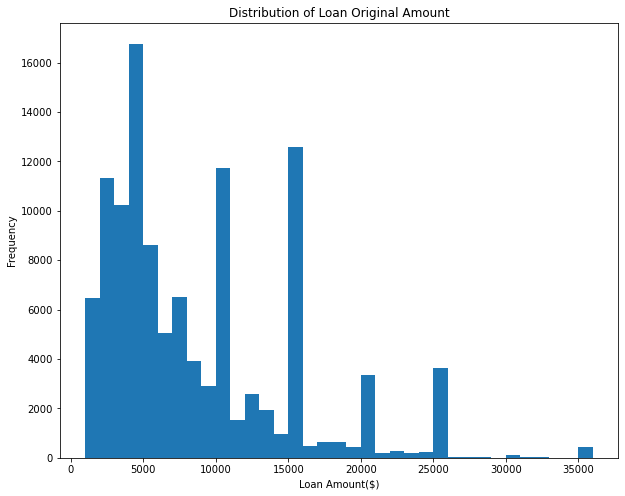

In [30]:
# Distribution for LoanOriginalAmount
binsize = 1000
bins = np.arange(1000, loan_sub['LoanOriginalAmount'].max()+binsize+1000, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount($)')
plt.title('Distribution of Loan Original Amount')
plt.ylabel('Frequency')

Borrowers can borrow from dollars 1,000 to 35000 dollars. The most popular Loan Original Amount is 4,000 dollars. An interesting fact to note is that loan amount in multiples of 5000s were very popular among borrowers.

## 12. Distribution of Monthly Income

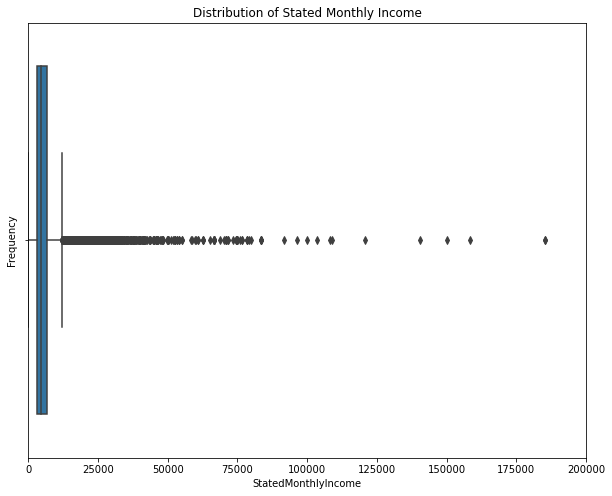

In [31]:
# Box Plot for StatedMonthlyIncome
plt.figure(figsize=[10, 8])

sns.boxplot(data=loan_sub, x='StatedMonthlyIncome');
plt.xlim(0,200000)
plt.title('Distribution of Stated Monthly Income')
plt.ylabel('Frequency');

The Stated Monthly Income has extreme values that seem to be outliers. Looking at distribution of values on the box plot, values above 10,000 seem to be too exceptionally high to be reported as monthly income. One explanation for this may be that some of the borrowers mistakenly reported their yearly earnings as monthly earnings. To ensure integrity of the analysis, I will evaluate the counts of the  Stated Monthly Income above $10,000 and remove them if they do not take more than 10% of the entire dataset. 

In [32]:
df2 = loan_sub['StatedMonthlyIncome'] > 10000
outliers = loan_sub[df2]['LoanStatus'].count()
total = loan_sub.shape[0]
outlier_percent = outliers/total
print(outliers,outlier_percent)

9780 0.08583690987124463


The outliers are less than 1% of the entire dataset so I will drop them

In [33]:
loan_sub= loan_sub.loc[loan_sub['StatedMonthlyIncome']<=10000]


loan_sub.shape

(104157, 15)

Text(0, 0.5, 'Frequency')

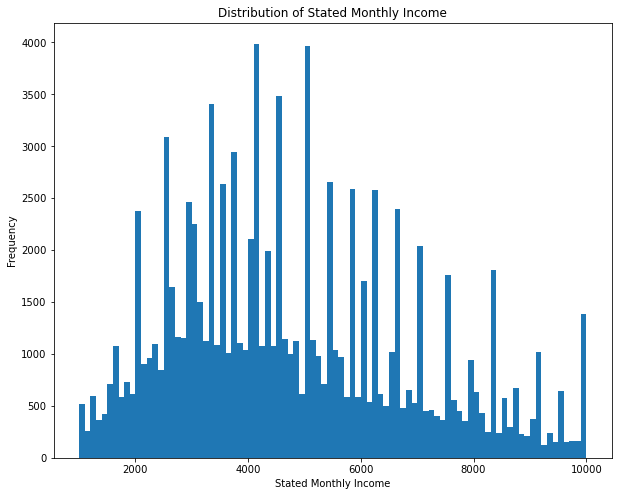

In [34]:
binsize = 100
bins = np.arange(1000, loan_sub['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = loan_sub, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated Monthly Income')
plt.ylabel('# of Borrowers')
plt.title('Distribution of Stated Monthly Income')
plt.ylabel('Frequency')

From the plot above, the Stated Monthly Income appears to be right skewed with a mode of about 4200 dollars and mean of about 5600 dollars

### Summary of the Univariate Distribution of the variables of interest

The Stated Monthly Income variable had an unusually large range of values. I checked the percentage of the values that were outliers to evaluate if they were dropable. At less than 1% of the entire dataset, I decided it was safe to drop those outliers. These unusual values may be due to error on the part of the borrowers while entering their details during application. They probably misinterpreted the question to mean how much they make yearly. Removing those outliers will ensure my analysis is clean and free from bias that may result from such wrong data.

# B. Bivariate Distribution

To start off, I want to look at the pairwise correlations present between features in the data.

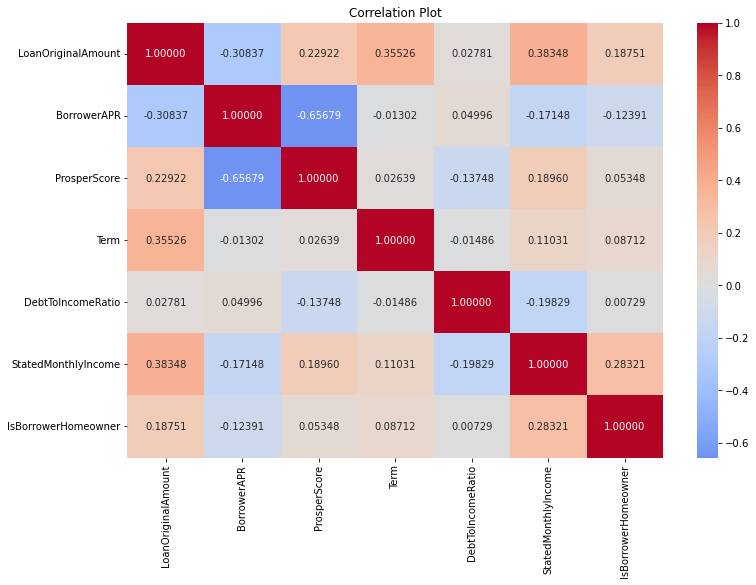

In [35]:
## To get a better idea about how the different columns are correlated, I select some interesting columns and create a correlation plot for them:

selected_cols = ['LoanOriginalAmount','BorrowerAPR', 'ProsperScore', 'Term','DebtToIncomeRatio', \
                 'StatedMonthlyIncome', 'IsBorrowerHomeowner']

plt.figure(figsize = [12,8])
sns.heatmap(loan_sub[selected_cols].corr(), annot=True, fmt = '.5f',
           cmap = 'coolwarm', center=0).set_title('Correlation Plot')
plt.show()

From the Correlation Plot, the only pair of variables with a significant correlation value is Borrower APR and Prosper Score. Both variables are moderately correlated, though negatively. Other pairs are either not correlated at all, or 
weakly correlated.

## 1. Prosper Score versus Borrower APR

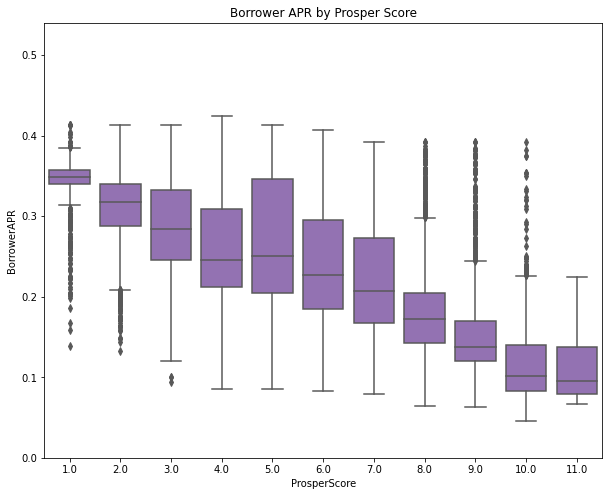

In [36]:
## Boxplot 
plt.figure(figsize = [10,8]) 
sns.boxplot(data=loan_sub, x='ProsperScore', y='BorrowerAPR', \
              color = sns.color_palette()[4])
plt.ylim(0, 0.54)
plt.title('Borrower APR by Prosper Score');

#### From the boxplot, it appears that as Prosper Score increases, the Borrower APR decreases, though there were outliers. This relationship compares positively with basic finanical knowledge, that borrowers with better credit score generally better terms including lower APR and Interest Rates.

 ## 2. Loan Amount Versus Prosper Score

Text(0.5, 1.0, 'Box plot showing relation between APR and loan status')

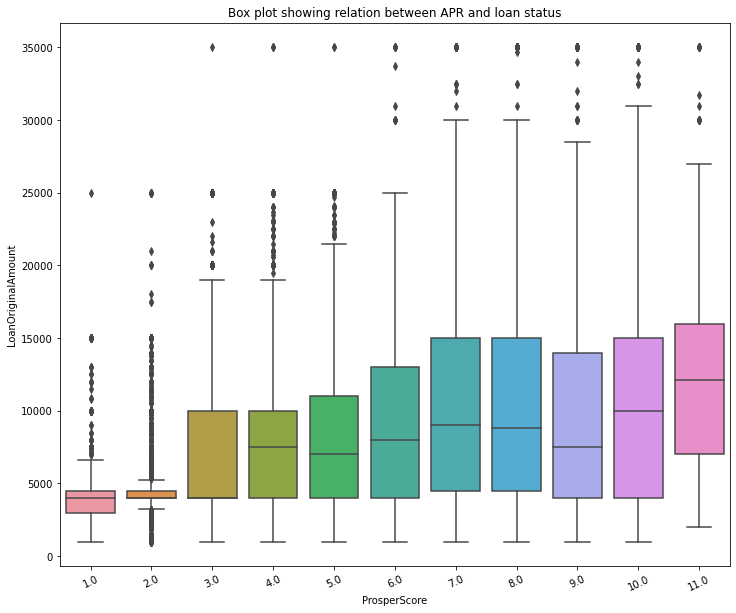

In [37]:
plt.figure(figsize=(12,10))
sns.boxplot(x='ProsperScore',y='LoanOriginalAmount',data=loan_sub)
plt.xticks(rotation=25)
plt.title('Box plot showing relation between APR and loan status')

### Generally, lower Prosper Score are related with lower Amounts while higher amounts are correlated with higher prosper score. This is also in line with conventional finance. Borrowers with better credit score qualify for higher amounts. 

## 3. Loan Amount versus Is Borrower Home Owner

Text(0.5, 1.0, 'Box plot showing relation between APR and loan status')

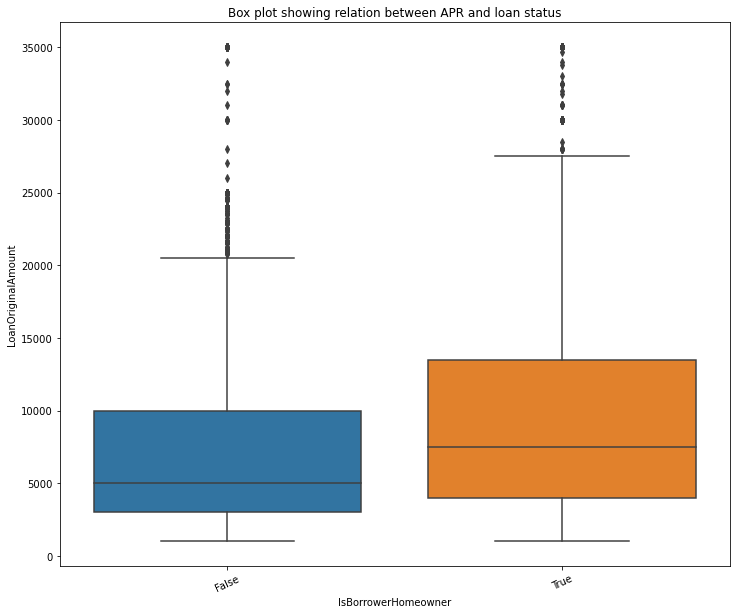

In [38]:
plt.figure(figsize=(12,10))
sns.boxplot(x='IsBorrowerHomeowner',y='LoanOriginalAmount',data=loan_sub)
plt.xticks(rotation=25)
plt.title('Box plot showing relation between APR and loan status')

#### Borrowers who noted that they are home owners, from the plot, received higher amounts. This makes sense given that having a home typically boosts the credibility of a loan application.

## 4. Loan Status versus Loan Amount

Text(0.5, 1.0, 'Box plot showing relation between Loan Original Amount and loan status')

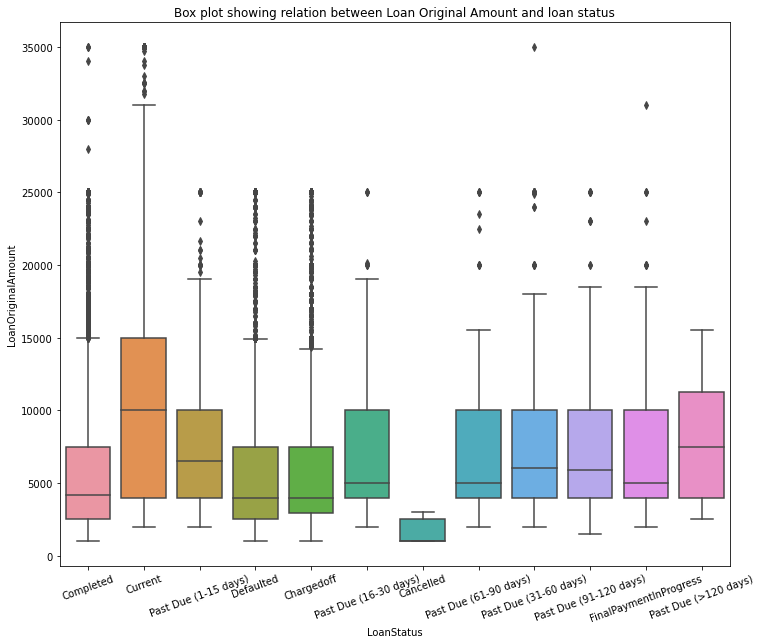

In [39]:
plt.figure(figsize=(12,10))
sns.boxplot(x='LoanStatus',y='LoanOriginalAmount',data=loan_sub)
plt.xticks(rotation=20)
plt.title('Box plot showing relation between Loan Original Amount and loan status')

#### From the plot, It was interesting to see that loan defaulters were mostly individuals who received higher amounts than those who completed their payments on time. Borrowers with current loans recorded the highest loan amounts. It will be interesting to see if those with these current loans would go with the trend of defaulting loans rather than completing their payment in record time. The company should ideally make stricter rules that would make defaulting less attractive to borrowers.

## 5.  (Debt To Income Ratio, Loan Amount, Borrower APR and Stated Monthly Income) versus Borrower APR

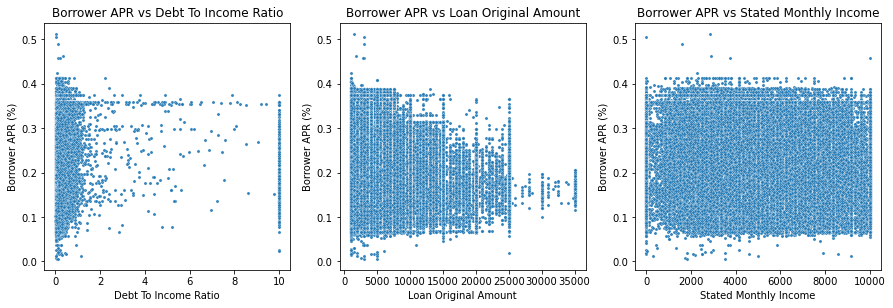

In [40]:
plt.figure(figsize = (15, 10))


plt.subplot(231)
sns.scatterplot(x = 'DebtToIncomeRatio',y = 'BorrowerAPR', s= 10, alpha = 0.9,
                data = loan_sub)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Borrower APR (%)')
plt.title('Borrower APR vs Debt To Income Ratio')

plt.subplot(232)
sns.scatterplot(x = 'LoanOriginalAmount',y = 'BorrowerAPR', s= 10, alpha = 0.9,
                data = loan_sub)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR (%)')
plt.title('Borrower APR vs Loan Original Amount')

plt.subplot(233)
sns.scatterplot(x = 'StatedMonthlyIncome',y = 'BorrowerAPR', s= 10, alpha = 0.9,
                data = loan_sub)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Borrower APR (%)')
plt.title('Borrower APR vs Stated Monthly Income');

#### In the three plots, there seems to be no strongly defined relationship between the variables and Borrower APR. However, for the loan original amount versus borrower APR, those who got above $25,000 seems to have lower APR. While this may seem odd to a non-finance person, it is actually logical given that those who qualify for higher amounts typically get better deals which may include lower APRs.

## 6. (Debt To Income Ratio, Term, Stated Monthly Income) versus Loan Amount

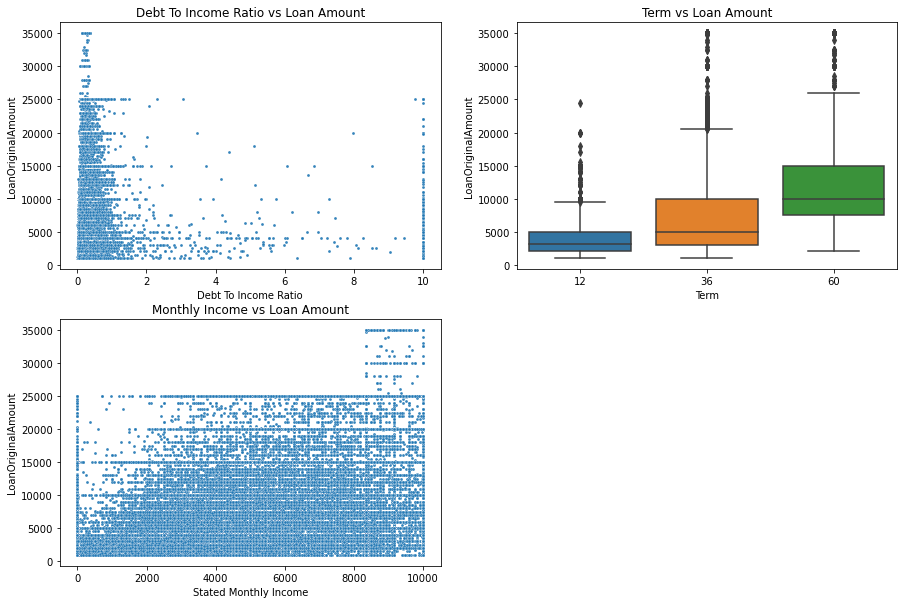

In [41]:
plt.figure(figsize = (15, 10))


plt.subplot(221)
sns.scatterplot(x = 'DebtToIncomeRatio',y = 'LoanOriginalAmount', s= 9, alpha = 0.9,
                data = loan_sub)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('LoanOriginalAmount')
plt.title('Debt To Income Ratio vs Loan Amount')

plt.subplot(222)
sns.boxplot(x = 'Term',y = 'LoanOriginalAmount',
                data = loan_sub)
plt.xlabel('Term')
plt.ylabel('LoanOriginalAmount')
plt.title('Term vs Loan Amount')

plt.subplot(223)
sns.scatterplot(x = 'StatedMonthlyIncome',y = 'LoanOriginalAmount', s= 9, alpha = 0.9,
                data = loan_sub)
plt.xlabel('Stated Monthly Income')
plt.ylabel('LoanOriginalAmount')
plt.title('Monthly Income vs Loan Amount');

#### In terms of Monthly Income versus Loan Amount, there seems to be no defined trend. However, those with the highest monthly income seem to have received the highest loan original amount.

#### For the Debt To Income Ratio, there appears to be a strong correlation between those with lower ratio and higher loan amounts. This makes sense given that borrowers with better ratio are generally more credible and receive higher amounts.  It is however interesting that some borrowers with a poor debt to income ratio still received reasonable amounts.

#### For the Loan Term, those with longer terms received higher amounts while those with 12 months term got lower amounts. The underlying logic behind these relationships is that lower loans are generally easier to pay back, as such do not get higher terms compared to longer terms.

## 7. Monthly Income versus Prosper Score

Text(0.5, 1.0, 'StatedMonthlyIncome vs Prosper Score')

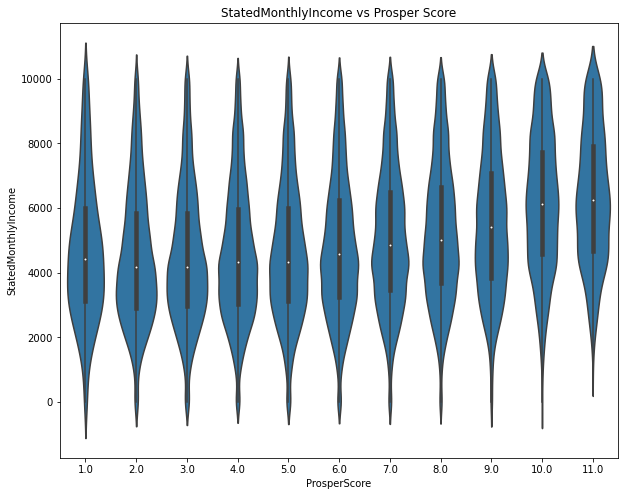

In [42]:
plt.figure(figsize = [10,8]) 
sns.violinplot(data=loan_sub, x='ProsperScore', y='StatedMonthlyIncome', \
              color = sns.color_palette()[0])
plt.title('StatedMonthlyIncome vs Prosper Score')

#### Examining this plot, it appears that those with higher prosper score also have higher stated monthly income. This makes sense in real world sense given that people who make more money typically have better credit score, thanks to their financial stability which makes it easy for them to boost their credit score over time.

## 8. Loan Origination Month versus Loan Original Amount, Loan Origination Year versus Loan Original Amount

<AxesSubplot:title={'center':'Mean Loan Amount Per Year'}, xlabel='Total Loan Amount', ylabel='Year'>

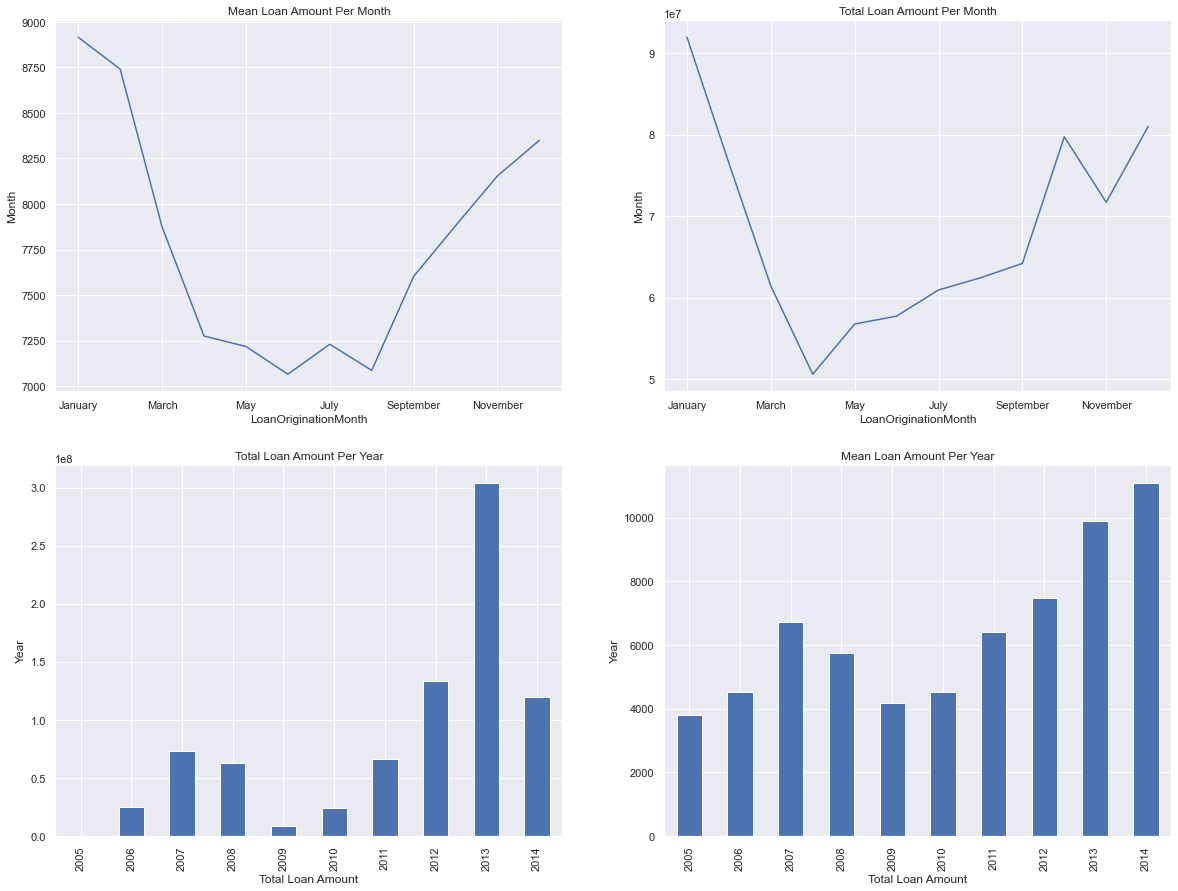

In [43]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,15))


plt.subplot(221)
loan_sub.groupby('LoanOriginationMonth').LoanOriginalAmount.mean().plot(kind = 'line',
                                                                       label = "Total Loan Amount",
                                                                      ylabel = "Month",
                                                                     title = "Mean Loan Amount Per Month")


plt.subplot(222)
loan_sub.groupby('LoanOriginationMonth').LoanOriginalAmount.sum().plot(kind = 'line',
                                                                       label = "Total Loan Amount",
                                                                      ylabel = "Month",
                                                                     title = "Total Loan Amount Per Month")

plt.subplot(223)
loan_sub.groupby('LoanOriginationYear').LoanOriginalAmount.sum().plot(kind = 'bar',
                                                                      xlabel = "Total Loan Amount",
                                                                      ylabel = "Year",
                                                                     title = "Total Loan Amount Per Year")

plt.subplot(224)
loan_sub.groupby('LoanOriginationYear').LoanOriginalAmount.mean().plot(kind = 'bar',
                                                                      xlabel = "Total Loan Amount",
                                                                      ylabel = "Year",
                                                                     title = "Mean Loan Amount Per Year")

##### Using the first plot, we can see that January has the highest average loan amount of all the months while May and June have the lowest average loan amounts. As I noted earlier, January having the highest average loan amount is logical given that it is the first month of the calendar year which means people typically tend to get loans in the month so as to plan and carry out their finanical obligations for the entire year. By the mid-months of the year, it is logical that the average loan amounts reduces to the barest minimum given that people have not-so-much reason to get loans especially if they have in January.

#### In terms of the years, The average loan amount per year has shown a geometric growth over the years except between 2008 to 2009 when there was a global economic recession and thus, a dip in the mean average amount. I suspect the company itself suffered in terms of revenue / funding and as such, reduced the amount of loans it gave out to borrowers, especially to those whose source of income were affected at the time.

## 9. Employment Status versus Loan Amount

<AxesSubplot:xlabel='EmploymentStatus', ylabel='LoanOriginalAmount'>

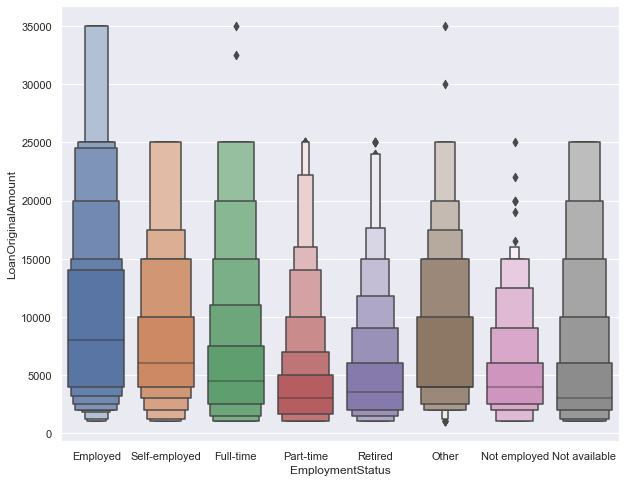

In [44]:
f, ax = plt.subplots(figsize=(10,8))



sns.boxenplot(x="EmploymentStatus", y="LoanOriginalAmount",
              scale="linear", data=loan_sub)

#### As expected, those who are employed got higher amounts while the not employed had the least amounts. 

## 10. Borrower State versus Loan Amount

<AxesSubplot:title={'center':'Mean Loan Amount Per State'}, ylabel='State'>

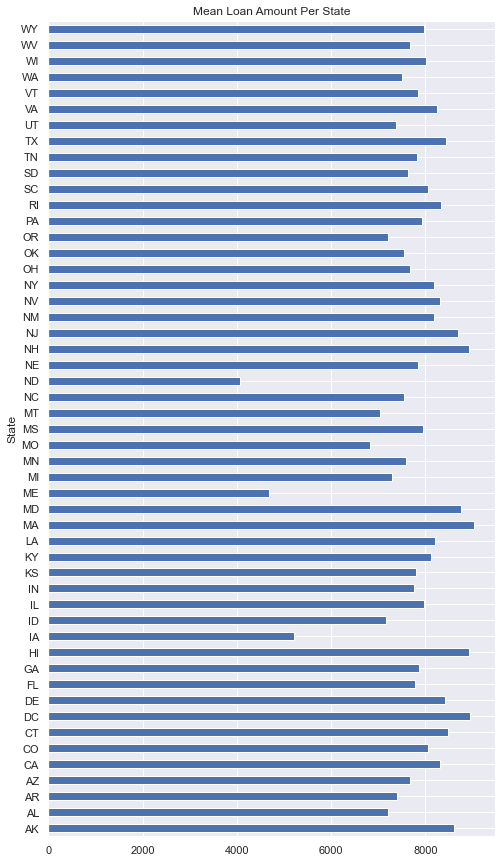

In [45]:
f, ax = plt.subplots(figsize=(8,15))

loan_sub.groupby('BorrowerState').LoanOriginalAmount.mean().plot(kind = 'barh',
                                                                      xlabel = "State",
                                                                      ylabel = "Mean Amount",
                                                                     title = "Mean Loan Amount Per State")

### 11. Employment Status versus Monthly Income

#### As seen from the plot, American Samoa interesting recorded the highest mean loan Amount with the average loan recorded a little more than 9,000 dollars. An explanation for this would be that those who are able to acces loans in the country are well-to-do and as such qualify to higher amounts. Moreover, the state consists of mostly communally-owned business and assests and as such a single loan application may be attached to more than one individual.

#### North Dakota has the least mean loan amount of all the states. A quick search on Google about the state shows that the state is the fourth least populous and fourth most sparsely populated implying that the number of applications from the state would be exceptionally low and thus affecting the average loan amount from the state.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Although the Pearson Correlation Plot shows a lot of weak correlation coefficients among the variables, the plots gave me a better outlook of how each variable is related to one another. For my main variable of interest, Loan Amounts, I found that:

1. Employed individuals got higher amounts while those that are unemployed got the least amounts

2. There was a positive growth in the average amounts given out to borrowers over the years, safe for 2008 to 2009 where there was an economic recession. While the average amount was highest in 2014, 2013 had the highest count of loans given out. This will be an interesting point to look into.

3. January is both the month with the highest average loan amount and the month with the highest count of loans given out. This makes sense given that the month is the start of financial year for most people. There was a maximum dip around the middle of the month with June and May sharing the record for the month with the lowest average amount per borrower and April having the lowest count of loans given out to borrowers.

4. Borrowers who had the highest monthly income got the highest loans. 

5. Those with 12 month loan term got the lowest amount. It is interesting to note that there was no definite relationship between those who got 24 months term and those with 36 month term with respect to loan amounts.

6. Also, those with the lowest debt to income ratio got the highest amount expectedly since they have are seen as more qualified for higher amounts.

7. It was interesting to see that lots of defaulters got high amounts while those who completed their payments on time secured not so high amounts comparably. Those with the current loans receive the highest amounts. 

8. Borrowers who answered yes to being a home owner recieved slightly higher amounts than those who answered NO.

9. In terms of Prosper Score, which is synonymous to credit score, those with highest score, got the highest amounts. Generally, a trend of high amounts was noted between those with 7.0 to 11.0 scores.

10. Borrowers from American Samoa received the highest average loan amounts while those from North Dakota got the lowest average amount.

Although the plots do not show 100% definite trends, the extreme values gave a good idea of how the extreme values impact the Loan Amounts. I will explore a couple of multivariate variables to have a better idea of how the variables intersect in terms of relationships in the next section.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found in the association between the Borrower APR and Prosper Score. The Borrower APR `was highest in 2006. 2016/2017 also recorded the lowest APR perhaps because the firm was just starting out. Also, those with the highest monthly income had the highest prosper score which can be expected given they have more financial stability and can avoid bad loans easily.

# C. Multivariate Exploration

The main thing I want to explore in this part of the analysis is how Debt To Income Ratio, Employment Status, Stated Monthly Income, Term, Origination Year, Home ownership, Loan Status and Prosper Score interact with the Loan Amounts

## 1. Prosper Score vs Debt To Income Ratio vs Loan Amount

Text(0.5, 0.98, 'Prosper Score vs Debt To Income Ratio vs Loan Amount')

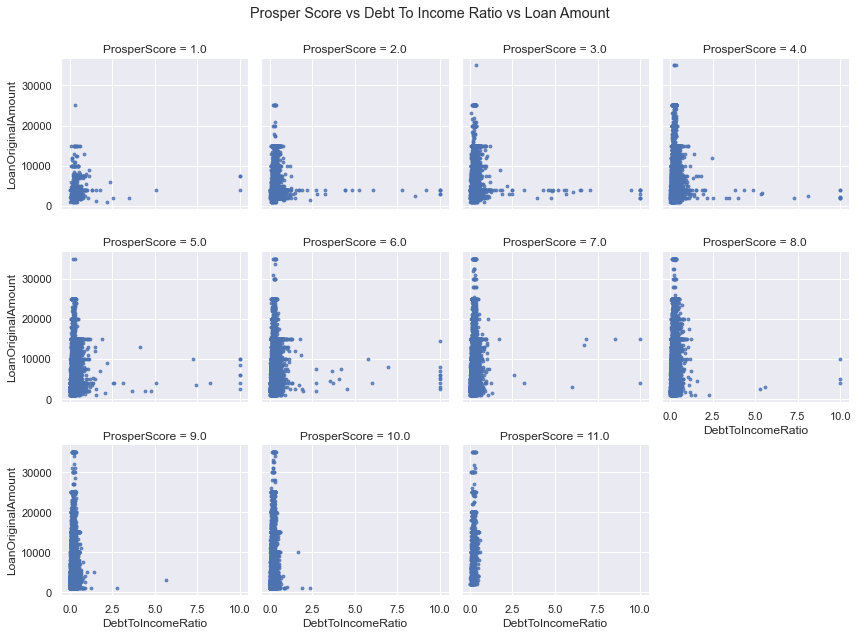

In [46]:
plot = sns.FacetGrid(data = loan_sub, col = 'ProsperScore', col_wrap=4)
plot.map(plt.scatter, 'DebtToIncomeRatio', 'LoanOriginalAmount', s= 8, alpha = 0.8)
plot.add_legend()
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Prosper Score vs Debt To Income Ratio vs Loan Amount')

#### Borrowers who have high debt to income ratio and low prosper score (1-5) tend to receive less amounts when compared with those with low debt to income ratio and high prosper score. Further more, those with low debt to income ratio and high prosper score tend to receive the highest amount. While those with high debt to income ratio and low prosper score seem to receive the least amount.

## 2. Employment Status vs Stated Monthly Income vs Loan Amount

Text(0.5, 0.98, 'Employment Status vs Stated Monthly Income vs Loan Amount')

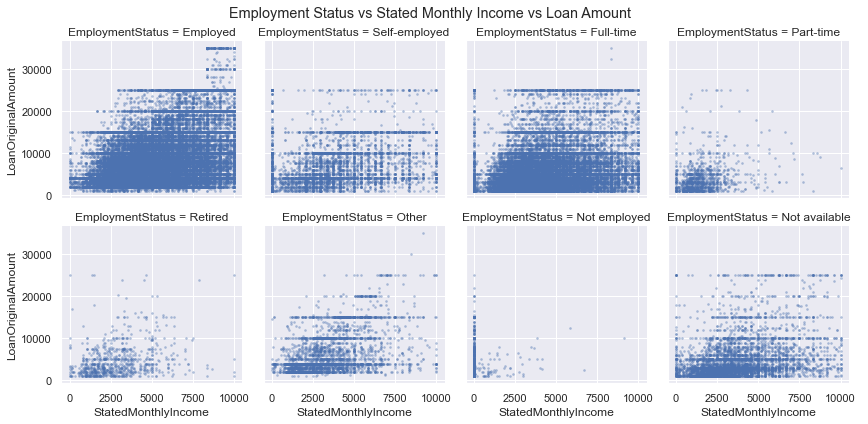

In [47]:
plot = sns.FacetGrid(data = loan_sub, col = 'EmploymentStatus', col_wrap=4)
plot.map(plt.scatter, 'StatedMonthlyIncome', 'LoanOriginalAmount', s= 3, alpha = 0.3)
plot.add_legend()
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Employment Status vs Stated Monthly Income vs Loan Amount')

#### Borrowers with lower monthly income who are unemployed received the lowest loan amounts. For those who are employed, loan amounts seem to increase with higher monthly incomes, with those making between 8,000 to 10,000 dollars receiving the highest amounts of all the borrowers. The other employment status are pretty average with very few number of borrowers who fall in the categories receiving up to 30,000 dollars in loan amounts.

## 3. Loan Status vs Term vs Loan Amount'

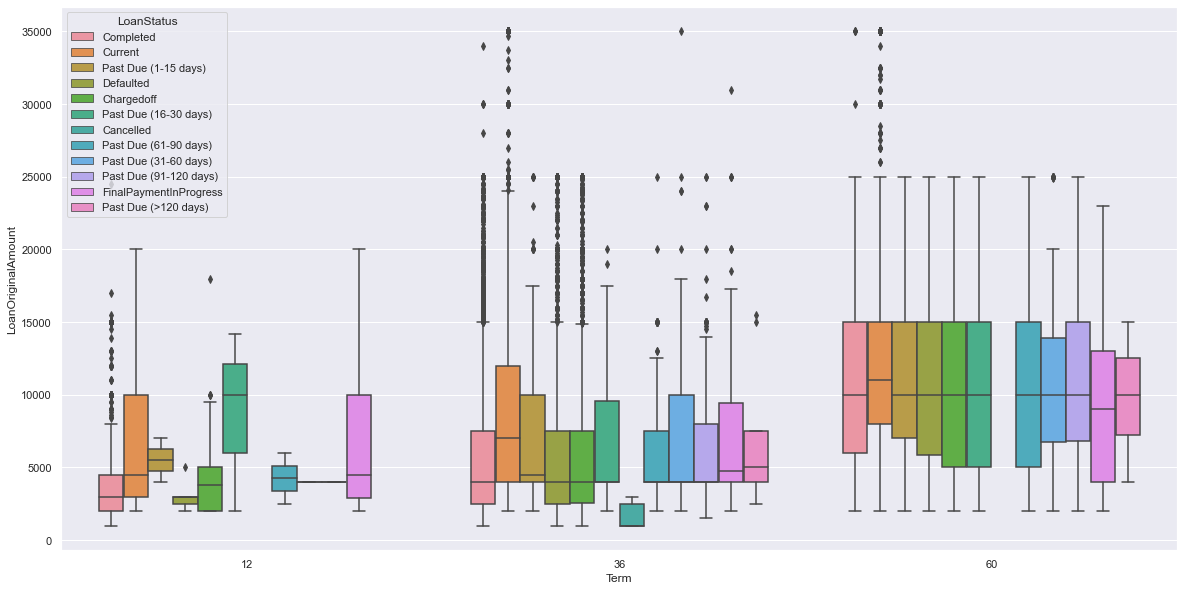

In [48]:
plot = sns.boxplot(data=loan_sub, x='Term', y='LoanOriginalAmount', hue='LoanStatus');
plot.figure.set_figwidth(20)
plot.figure.set_figheight(10)

#### Borrowers with current loans seem to get the highest amount and longest terms. Borrowers who weren't paying on terms rarely featured on the 12 month term list and got lower amounts too when compared with those with current and completed loans.

## 4. Loan Year vs Is Borrower Owner vs Term

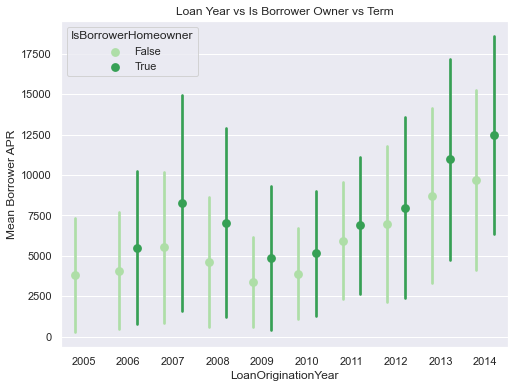

In [49]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = loan_sub, x = 'LoanOriginationYear', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Loan Year vs Is Borrower Owner vs Term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

#### There seems to be an increase in the amounts Home Owners receive yearly, however, there was a major dip between 2008-2010 perhaps due to Global Recession. Since 2010, there has been an upturn in the amount received by homeowners.

## 5. Term versus Prosper Score versus Loan Amount

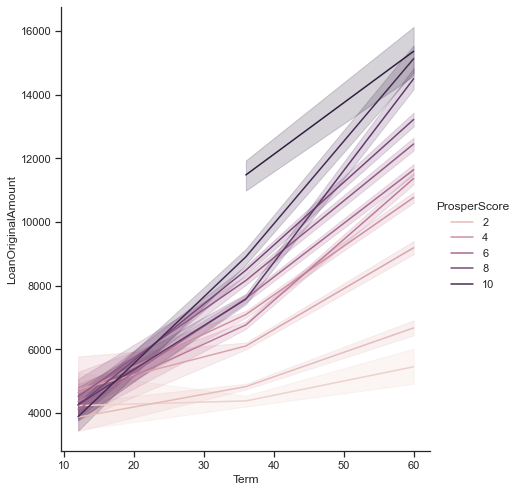

In [50]:
sns.set_theme(style="ticks")

sns.relplot(
    data=loan_sub,
    x="Term", y="LoanOriginalAmount",
    hue="ProsperScore",
    kind="line",
    height=7, aspect=.90, facet_kws=dict(sharex=False),)

#### Borrowers with the highest prosper score do not only get the highest amounts, they also get the longest terms on the average when compare with those with lower prosper scores.

## 6. Loan Month versus Loan Amount versus Employment Status

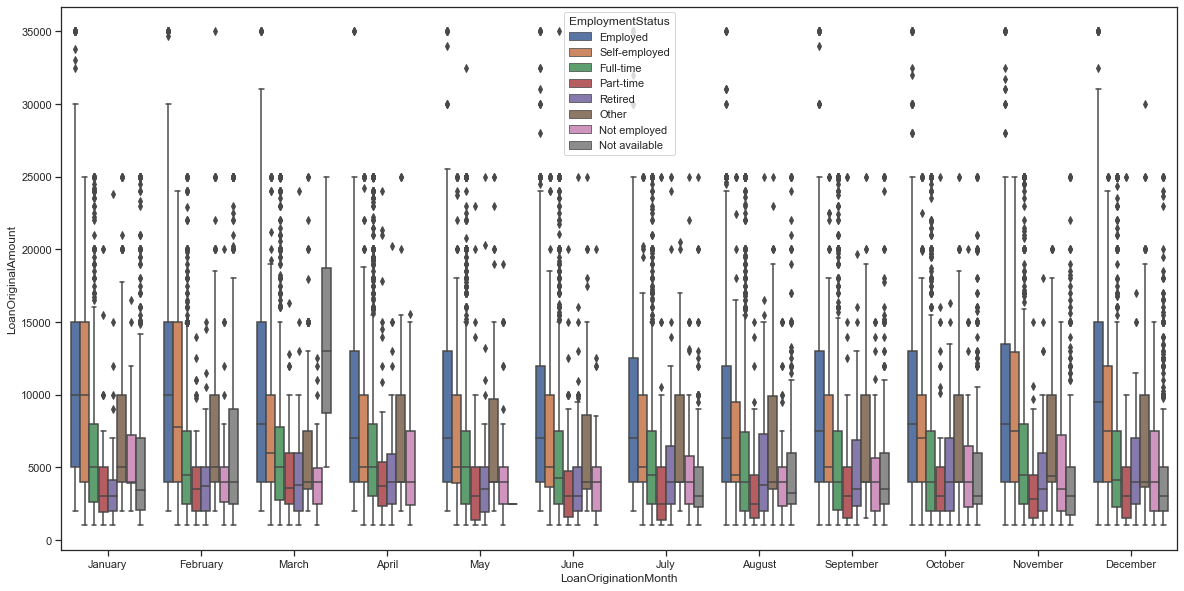

In [51]:
# Next, I want to take a look at how the homeowner's and non-homeowner's Borrower APR has changed over the years

plot = sns.boxplot(data=loan_sub, x='LoanOriginationMonth', y='LoanOriginalAmount', hue='EmploymentStatus');
plot.figure.set_figwidth(20)
plot.figure.set_figheight(10)

#### For Self-Employed borrowers, January and February are the best months to receive higher amounts. For Employed borrowers, January, February, March, and December are the best months to receive higher amounts. For not-employed borrowers, March is the best month to receive higher amounts. For Retired borrowers, August is the best month to receive higher amounts.

### Relationships observed

I extended my investigation of Loan Amounts in this section by looking at the impact of Debt To Income Ratio, Employment Status, Stated Monthly Income, Term, Origination Year, Loan Status and Prosper Score on the Loan Amounts. The multivariate exploration here showed that there indeed is a positive effect of increased prosper score on loan amounts and loan terms.

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it doesn't seem like there's a definite systematic interaction effect between the  the variables and loan amounts. However, the features also aren't fully independent.

### Reflection


The data set had 113937 loans from Nov 2005 - March 2014. Through those years, Prosper has given out a total of 949894347 dollars in loans. A major challenge I had with the data was with understanding the variables and then selecting the best ones to analyze. My approach was to do an initial exploration of the data and even then I probably selected a bit too many. From the features I selected, I noticed that the firm struggled initially with their first 2-3 years of business. However, their business has been growing very quickly since the cease and desist by the SEC in 2009. This was a great learning experience about the Lending Business operations and I’m glad Udacity gave me the opportunity access to this data.